<a href="https://colab.research.google.com/github/BachXZC2402/Entity_Recognition/blob/main/Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Bài 1  Sử dụng mô hình Transformers***

In [ ]:
!pip install simpletransformers
!pip install livelossplot

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from simpletransformers.ner import NERModel,NERArgs
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

data = pd.read_csv("ner_dataset.csv",encoding="latin1" )

In [ ]:
data =data.fillna(method ="ffill")

In [ ]:
data.head(40)

Sentence #           Word  POS    Tag
0   Sentence: 1      Thousands  NNS      O
1   Sentence: 1             of   IN      O
2   Sentence: 1  demonstrators  NNS      O
3   Sentence: 1           have  VBP      O
4   Sentence: 1        marched  VBN      O
5   Sentence: 1        through   IN      O
6   Sentence: 1         London  NNP  B-geo
7   Sentence: 1             to   TO      O
8   Sentence: 1        protest   VB      O
9   Sentence: 1            the   DT      O
10  Sentence: 1            war   NN      O
11  Sentence: 1             in   IN      O
12  Sentence: 1           Iraq  NNP  B-geo
13  Sentence: 1            and   CC      O
14  Sentence: 1         demand   VB      O
15  Sentence: 1            the   DT      O
16  Sentence: 1     withdrawal   NN      O
17  Sentence: 1             of   IN      O
18  Sentence: 1        British   JJ  B-gpe
19  Sentence: 1         troops  NNS      O
20  Sentence: 1           from   IN      O
21  Sentence: 1           that   DT      O
22  Sentence: 1        country   NN      O
23  Sentence: 1              .    .      O
24  Sentence: 2       Families  NNS      O
25  Sentence: 2             of   IN      O
26  Sentence: 2       soldiers  NNS      O
27  Sentence: 2         killed  VBN      O
28  Sentence: 2             in   IN      O
29  Sentence: 2            the   DT      O
30  Sentence: 2       conflict   NN      O
31  Sentence: 2         joined  VBD      O
32  Sentence: 2            the   DT      O
33  Sentence: 2     protesters  NNS      O
34  Sentence: 2            who   WP      O
35  Sentence: 2        carried  VBD      O
36  Sentence: 2        banners  NNS      O
37  Sentence: 2           with   IN      O
38  Sentence: 2           such   JJ      O
39  Sentence: 2        slogans  NNS      O

In [ ]:
X= data[["Sentence #","Word"]]
Y =data["Tag"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)

In [ ]:
# Tạo lại tập dữ liệu
train_data = pd.DataFrame({"Sentence #":x_train["Sentence #"],"Word":x_train["Word"],"Tag":y_train})
test_data = pd.DataFrame({"Sentence #":x_test["Sentence #"],"Word":x_test["Word"],"Tag":y_test})

In [ ]:
label = data["Tag"].unique().tolist()
label

['O',
 'B-geo',
 'B-gpe',
 'B-per',
 'I-geo',
 'B-org',
 'I-org',
 'B-tim',
 'B-art',
 'I-art',
 'I-per',
 'I-gpe',
 'I-tim',
 'B-nat',
 'B-eve',
 'I-eve',
 'I-nat']

In [ ]:
args = NERArgs()
args.num_train_epochs = 1
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 32
args.eval_batch_size = 32

model = NERModel('bert', 'bert-base-cased',labels=label,args=args)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tạo lại tập dữ liệu
train_data = pd.DataFrame({"sentence_id":x_train["Sentence #"],"words":x_train["Word"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":x_test["Sentence #"],"words":x_test["Word"],"labels":y_test})

# Train the model
model.train_model(train_data,eval_data = test_data,acc=accuracy_score)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/1499 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


(1499, 0.1939161920881494)

In [ ]:
result, model_outputs, preds_list = model.eval_model(test_data)
true_labels = test_data['labels'].tolist()
pred_labels = [item for sublist in preds_list for item in sublist]

# Đánh giá mô hình
accuracy1 = accuracy_score(true_labels, pred_labels)
precision1, recall1, f1_score1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/2 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Running Evaluation:   0%|          | 0/1461 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print the results
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f1_score1}")

Accuracy: 0.7311684905705362
Precision: 0.7203416057070604
Recall: 0.7311684905705362
F1 Score: 0.7256788661949013


In [ ]:
prediction, model_output = model.predict(["That is the shortest way to go from the Indian Ocean to the Pacific Ocean"])
prediction

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'That': 'O'},
  {'is': 'O'},
  {'the': 'O'},
  {'shortest': 'O'},
  {'way': 'O'},
  {'to': 'O'},
  {'go': 'O'},
  {'from': 'O'},
  {'the': 'O'},
  {'Indian': 'B-geo'},
  {'Ocean': 'I-geo'},
  {'to': 'O'},
  {'the': 'O'},
  {'Pacific': 'B-geo'},
  {'Ocean': 'I-geo'}]]

In [ ]:
# đọc bộ dữ liệu mới dùng để test
new_test_data =pd.read_csv('test_data.csv')

new_test_data = pd.read_csv('test_data.csv')
new_test_data = new_test_data.rename(columns={'Sentence #': 'sentence_id', 'Word': 'words', 'Tag': 'labels'})
new_test_data['words'] = new_test_data['words'].astype(str)
new_test_data['labels'] = new_test_data['labels'].astype(str)

# Đánh giá mô hình trên bộ dữ liệu mới
result, model_outputs, new_preds_list = model.eval_model(new_test_data)
new_true_labels = new_test_data['labels'].tolist()
new_pred_labels = [item for sublist in new_preds_list for item in sublist]

#  Xác định hàm để trích xuất các thực thể từ danh sách nhãn
def extract_entities(labels):
    entities = []
    entity = []
    for label in labels:
        if label.startswith("B-") or (label.startswith("I-") and not entity):
            if entity:
                entities.append(entity)
            entity = [label]
        elif label.startswith("I-") and entity:
            entity.append(label)
        else:
            if entity:
                entities.append(entity)
            entity = []
    if entity:
        entities.append(entity)
    return entities

# Gán nhãn thực thể từ nhãn thực tế và nhãn dự đoán
true_entities = extract_entities(true_labels)
pred_entities = extract_entities(pred_labels)

# TÍnh tổng số thực thể
total_entities = len(true_entities)

# tính tổng số thực thể đúng từ nhãn dự đoán
correct_entities = sum([1 for true, pred in zip(true_entities, pred_entities) if true == pred])

# in
print(f"Total number of entities: {total_entities}")
print(f"Number of correctly predicted entities: {correct_entities}")
print(f"Percentage of correctly predicted entities: {correct_entities / total_entities * 100:.2f}%")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/305 [00:00<?, ?it/s]

Total number of entities: 30639
Number of correctly predicted entities: 3783
Percentage of correctly predicted entities: 12.35%


# ***Bài 2 Sử dụng mô hình Bi-LSTM***

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.15.0
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
data = pd.read_csv('ner_dataset.csv', encoding='latin1')
data = data.fillna(method='ffill')
data.head(20)

Sentence #           Word  POS    Tag
0   Sentence: 1      Thousands  NNS      O
1   Sentence: 1             of   IN      O
2   Sentence: 1  demonstrators  NNS      O
3   Sentence: 1           have  VBP      O
4   Sentence: 1        marched  VBN      O
5   Sentence: 1        through   IN      O
6   Sentence: 1         London  NNP  B-geo
7   Sentence: 1             to   TO      O
8   Sentence: 1        protest   VB      O
9   Sentence: 1            the   DT      O
10  Sentence: 1            war   NN      O
11  Sentence: 1             in   IN      O
12  Sentence: 1           Iraq  NNP  B-geo
13  Sentence: 1            and   CC      O
14  Sentence: 1         demand   VB      O
15  Sentence: 1            the   DT      O
16  Sentence: 1     withdrawal   NN      O
17  Sentence: 1             of   IN      O
18  Sentence: 1        British   JJ  B-gpe
19  Sentence: 1         troops  NNS      O

In [ ]:
data['Sentence #'].unique()

array(['Sentence: 1', 'Sentence: 2', 'Sentence: 3', ...,
       'Sentence: 47957', 'Sentence: 47958', 'Sentence: 47959'],
      dtype=object)

In [ ]:
data.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [ ]:
print("unique words: ",data["Word"].nunique())
print("unique tags: ",data["Tag"].nunique())

unique words:  35177
unique tags:  17


In [ ]:
#creating dataset for unique words, tags
words = list(set(data["Word"].values))
words.append("ENDPAD")
tags = list(set(data["Tag"].values))

In [ ]:
np.shape(words)

(35178,)

In [ ]:
num_words = len(words)
num_tags = len(tags)

In [ ]:
class Sentence_getter(object):
    def __init__(self, data):
        self.data = data
        agg_fun = lambda s: [(w, p, t) for w,p,t in zip(s["Word"].values.tolist(),
                                                       s["POS"].values.tolist(),
                                                       s['Tag'].values.tolist())]

        self.grouped = self.data.groupby('Sentence #').apply(agg_fun)
        self.sentences = [i for i in self.grouped]

In [ ]:
getter = Sentence_getter(data)

In [ ]:
sentences = getter.sentences

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [ ]:
# Tạo thư viện
word2idx = {w: i+1 for i,w in enumerate(words)}
tag2idx = {t: i for i,t in enumerate(tags)}

In [ ]:
tag2idx

{'B-gpe': 0,
 'I-eve': 1,
 'O': 2,
 'B-geo': 3,
 'I-per': 4,
 'I-art': 5,
 'I-org': 6,
 'I-tim': 7,
 'B-nat': 8,
 'I-nat': 9,
 'I-gpe': 10,
 'I-geo': 11,
 'B-eve': 12,
 'B-tim': 13,
 'B-org': 14,
 'B-per': 15,
 'B-art': 16}

[]

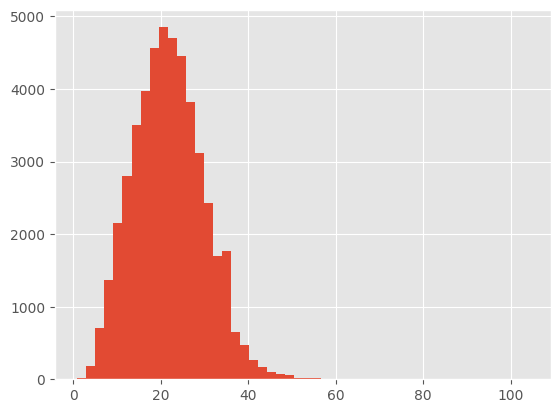

In [ ]:
plt.hist([len(s) for s in sentences], bins = 50)
plt.plot()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = max_len, sequences=X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = max_len, sequences=y, padding='post', value=tag2idx["O"])

In [ ]:
y = [to_categorical(i, num_classes=num_tags) for i in y]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1 )

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)

model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758900   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 50)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 50, 17)            3417      
 ributed)                                                        
                                                             

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

In [ ]:
type(y_train)

list

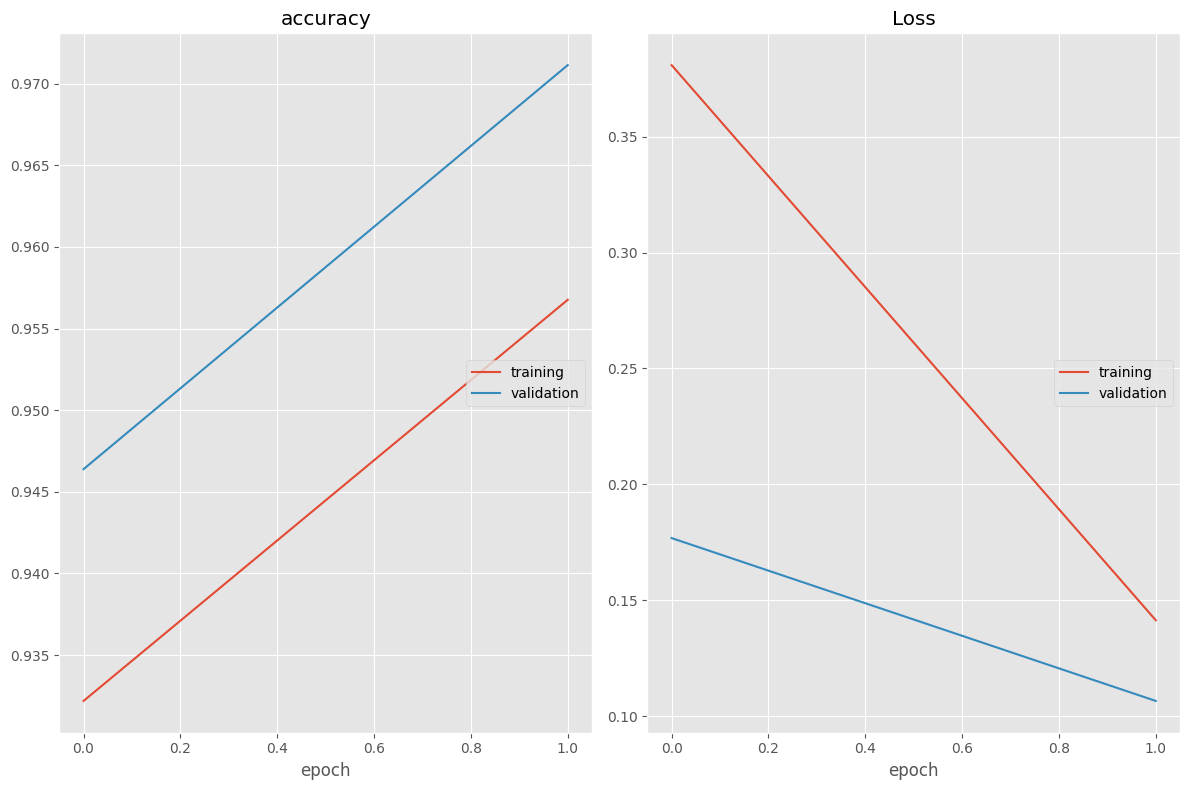

accuracy
	training         	 (min:    0.932, max:    0.957, cur:    0.957)
	validation       	 (min:    0.946, max:    0.971, cur:    0.971)
Loss
	training         	 (min:    0.141, max:    0.381, cur:    0.141)
	validation       	 (min:    0.107, max:    0.177, cur:    0.107)
270/270 [==============================] - 98s 363ms/step - loss: 0.1413 - accuracy: 0.9568 - val_loss: 0.1065 - val_accuracy: 0.9711


In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 1, verbose=0, mode='max', restore_best_weights=False)
callbacks = [PlotLossesKeras(), early_stopping]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=0.2,
    batch_size=128,
    epochs=2,
    verbose=1,
    callbacks=callbacks
)

In [ ]:
model.evaluate(x_test, np.array(y_test))

150/150 [==============================] - 5s 35ms/step - loss: 0.1096 - accuracy: 0.9713


[0.10955064743757248, 0.971276044845581]

In [ ]:
# mport numpy as np

# Assuming word2idx, num_words, tag2idx, and idx2tag are already defined
# Example for idx2tag dictionary
idx2tag = {0:'B-gpe',
 1: 'I-eve',
 2:'O',
 3:'B-geo',
 4:'I-per',
 5:'I-art',
 6:'I-org',
 7:'I-tim',
 8:'B-nat',
 9:'I-nat',
 10:'I-gpe',
 11:'I-geo',
 12:'B-eve',
 13:'B-tim',
 14:'B-org',
 15:'B-per',
 16:'B-art'}

# The sentence to predict
sentence = "That is the shortest way to go from the Indian Ocean to the Pacific Ocean"

# Tokenize the sentence
tokenized_sentence = [word2idx.get(w, num_words-1) for w in sentence.split()]

# Pad the sequence
padded_sentence = pad_sequences([tokenized_sentence], maxlen=max_len, padding='post', value=num_words-1)

# Predict the tags
predictions = model.predict(padded_sentence)

# Convert predictions from indices to tag names, handling potential KeyError
predicted_tags = [idx2tag.get(np.argmax(p), "unknown") for p in predictions[0]]

# Prepare the desired output format
output = [{word: tag} for word, tag in zip(sentence.split(), predicted_tags)]

# Print the result
print(output)

1/1 [==============================] - 0s 73ms/step
[{'That': 'O'}, {'is': 'O'}, {'the': 'O'}, {'shortest': 'O'}, {'way': 'O'}, {'to': 'O'}, {'go': 'O'}, {'from': 'O'}, {'the': 'O'}, {'Indian': 'B-gpe'}, {'Ocean': 'I-per'}, {'to': 'O'}, {'the': 'O'}, {'Pacific': 'B-geo'}, {'Ocean': 'I-geo'}]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, np.array(y_test))

# Predict on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(np.array(y_test), axis=-1)

# Flatten the predictions and true labels
y_pred_flat = y_pred.flatten()
y_true_flat = y_true.flatten()

# Calculate metrics
accuracy2 = accuracy_score(y_true_flat, y_pred_flat)
precision2 = precision_score(y_true_flat, y_pred_flat, average='macro')
recall2 = recall_score(y_true_flat, y_pred_flat, average='macro')
f1_score2 = f1_score(y_true_flat, y_pred_flat, average='macro')

print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1-Score: {f1_score2}")

150/150 [==============================] - 6s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9712760633861551
Precision: 0.41258442018334596
Recall: 0.33899485648592315
F1-Score: 0.35640628434779453


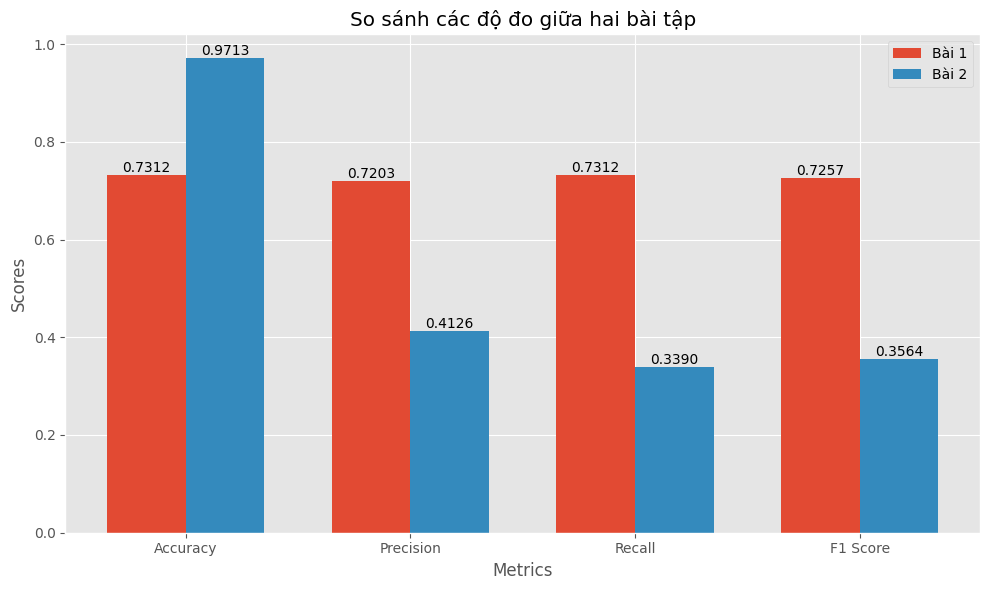

In [ ]:
import matplotlib.pyplot as plt

# Danh sách các độ đo và giá trị tương ứng cho từng bài tập
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values1 = [accuracy1, precision1, recall1, f1_score1]
values2 = [accuracy2, precision2, recall2, f1_score2]

# Vẽ biểu đồ
x = range(len(metrics))
width = 0.35  # Độ rộng của các cột

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x, values1, width=width, label='Bài 1', align='center')
bars2 = ax.bar([i + width for i in x], values2, width=width, label='Bài 2', align='center')

# Đặt tên cho các trục và tiêu đề
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('So sánh các độ đo giữa hai bài tập')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

# Hiển thị giá trị trên từng cột
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
